In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
from pycaret.classification import *

In [2]:
fitbit = pd.read_pickle('./data/fitbit_to_model.pkl')
fitbit["date"] = pd.to_datetime(pd.to_datetime(fitbit["date"]).dt.date)
fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,None,2351.59,62.79210,6517.5,[Walk],71.701565,149,24,33,713,False,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,0.866667,-2.462709,None,2332.08,62.67912,7178.6,[Walk],70.579300,132,25,31,704,False,NaN,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,0.866667,-2.385801,None,2262.30,62.57307,6090.9,[Walk],71.842573,112,27,31,710,False,NaN,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,0.833333,-2.124199,[LIFETIME_DISTANCE],2325.10,62.47493,6653.1,[Walk],71.725477,133,21,37,622,False,NaN,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19,-0.866025,0.433884,3.090170e-01,-0.724793,0.5,-0.900969,0.951057,0.688967
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,0.866667,-2.396873,None,2586.76,62.41166,9557.9,[Walk],74.401028,136,42,54,647,False,NaN,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19,-0.866025,-0.433884,3.090170e-01,-0.571268,0.5,-0.900969,0.951057,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,621e375b67b776a240290cdc,2021-07-22,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000,0.000000,NaN,None,1699.36,36.08147,4490.0,[Walk],74.782707,137,16,12,1210,False,NaN,72.171246,3900000.0,0.0,58.0,7.0,0.0,89.0,NaN,NaN,NaN,NaN,6805.0,57.0,1383.0,0.0,0.0,<30,FEMALE,23.0,0.866025,0.433884,3.090170e-01,-0.968077,0.5,-0.900969,-0.951057,-0.250653
4903,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,NaN,16.6,81.0,0.700000,0.800,0.933333,-1.467558,None,2437.51,36.32305,8309.8,"[Workout, Walk]",91.478693,294,59,43,567,False,NaN,69.927633,24960000.0,0.0,359.0,57.0,0.0,91.0,1.000000,1.096154,0.960177,1.153846,13187.0,366.0,1036.0,37.0,0.0,<30,FEMALE,23.0,0.866025,-0.433884,3.090170e-01,-0.998717,0.5,-0.900969,-0.951057,-0.050649
4904,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,NaN,17.0,84.0,0.833333,0.900,0.766667,-2.258333,None,2344.01,36.39149,8922.8,[Swim],84.184847,342,26,31,581,False,NaN,72.640440,27600000.0,0.0,414.0,46.0,0.0,94.0,0.500000,0.867925,1.276786,1.259259,13554.0,286.0,1152.0,2.0,0.0,<30,FEMALE,23.0,0.866025,-0.974928,3.090170e-01,-0.988468,0.5,-0.222521,-0.951057,0.151428
4905,621e3

Stage of behavior prediction

In [3]:
ttm = pd.read_pickle('./data/surveys/ttm.pkl')
ttm = ttm.rename(columns={"user_id": "id", "submitdate": "date"})
ttm["date"] = pd.to_datetime(pd.to_datetime(ttm["date"]).dt.date)
ttm

,id,type,date,stage,ttm_consciousness_raising,ttm_dramatic_relief,ttm_environmental_reevaluation,ttm_self_reevaluation,ttm_social_liberation,ttm_counterconditioning,ttm_helping_relationships,ttm_reinforcement_management,ttm_self_liberation,ttm_stimulus_control
0,621e2e8e67b776a24055b564,ttmspbf,2021-07-26,Maintenance,1.333333,2.666667,2.333333,4.333333,4.000000,4.000000,4.000000,4.000000,4.000000,1.666667
0,621e2eaf67b776a2406b14ac,ttmspbf,2021-11-29,Contemplation,3.333333,2.666667,4.000000,4.666667,4.000000,2.333333,3.000000,4.333333,3.333333,1.000000
1,621e2eaf67b776a2406b14ac,ttmspbf,2022-01-17,Action,3.666667,2.333333,4.333333,4.333333,3.333333,1.666667,3.000000,4.333333,3.333333,3.000000
0,621e2ed667b776a24085d8d1,ttmspbf,2021-06-07,Preparation,1.000000,2.000000,3.000000,3.333333,3.333333,1.000000,1.000000,3.333333,1.666667,1.000000
1,621e2ed667b776a24085d8d1,ttmspbf,2021-07-30,Contemplation,1.666667,2.333333,4.000000,3.333333,3.666667,1.333333,1.000000,2.333333,2.333333,1.666667
0,621e2f3967b776a240c654db,ttmspbf,2021-05-31,Preparation,2.000000,2.000000,2.666667,4.000000,5.000000,2.333333,2.000000,3.000000,2.333333,2.000000
0,621e2f6167b776a240e082a9,ttmspbf,2021-06-01,Contemplation,3.000000,4.666667,3.000000,5.000000,2.666667,2.000000,2.333333,4.666667,4.666667,4.000000
1,621e2f6167b776a240e082a9,ttmspbf,2021-08-02,Maintenance,2.000000,3.666667,2.666667,5.000000,2.333333,2.333333,2.333333,4.333333,4.666667,3.666667
0,621e2f7a67b776a240f14425,ttmspbf,2021-05-31,Maintenance,2.333333,1.333333,1.333333,4.333333,2.333333,3.000000,1.666667,4.666667,3.333333,2.333333
1,621e2f7a67b776a240f14425,ttmspbf,2021-07-30,Maintenance,1.666667,1.666667,2.666667,5.000000,2.333333,3.666667,1.000000,4.333333,3.000000,2.000000


In [4]:
fitbit_ttm = fitbit.merge(ttm[['id', 'date', 'stage']], on=['id','date'])
fitbit_ttm

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,stage
0,621e2e8e67b776a24055b564,2021-07-26,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,0.700,0.733333,-2.000223,None,2493.46,62.81010,8924.7,[Walk],72.003219,121,25,61,698,False,NaN,61.369921,32100000.0,0.0,449.0,86.0,0.0,95.0,1.402597,1.048780,0.793220,1.138298,12090.0,119.0,1293.0,1.0,0.0,<30,MALE,<19,8.660254e-01,0.000000,3.673940e-16,-8.486443e-01,0.5,1.000000,-1.000000,0.528964,Maintenance
1,621e2eaf67b776a2406b14ac,2021-11-29,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,>=30,FEMALE,<19,-8.660254e-01,0.000000,5.877853e-01,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,Contemplation
2,621e2eaf67b776a2406b14ac,2022-01-17,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,0.650,0.733333,-2.539780,None,2286.29,47.39134,11591.8,[Sport],82.763199,346,31,32,522,False,NaN,68.757643,30540000.0,0.0,457.0,52.0,0.0,94.0,1.193182,0.896552,1.048583,1.056818,16618.0,280.0,1152.0,8.0,0.0,>=30,FEMALE,<19,8.660254e-01,0.000000,8.090170e-01,-2.993631e-01,0.5,1.000000,0.587785,-0.954139,Action
3,621e2ed667b776a24085d8d1,2021-06-07,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,<30,FEMALE,23.0,-2.449294e-16,0.000000,8.090170e-01,9.884683e-01,1.0,1.000000,0.587785,0.151428,Preparation
4,621e2f3967b776a240c654db,2021-05-31,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,>=30,MALE,24.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,Preparation
5,621e2f6167b776a240e082a9,2021-06-01,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,>=30,FEMALE,>=25,-2.449294e-16,0.781831,5.877853e-01,2.012985e-01,1.0,0.623490,0.809017,0.979530,Contemplation
6,621e2f7a67b776a240f14425,2021-05-31,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,>=30,MALE,24.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,Maintenance
7,621e2f9167b776a240011ccb,2021-11-28,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,>=30,FEMALE,20.0,-8.660254e-01,-0.781831,8.090170e-01,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,Precontemplation
8,621e2fb367b776a24015accd,2021-05-31,34.312944,NaN,NaN,NaN

In [5]:
data = fitbit_ttm.drop(columns=['id', 'date', 'age', 'gender', 'bmi'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,stage
0,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,0.700,0.733333,-2.000223,None,2493.46,62.81010,8924.7,[Walk],72.003219,121,25,61,698,False,NaN,61.369921,32100000.0,0.0,449.0,86.0,0.0,95.0,1.402597,1.048780,0.793220,1.138298,12090.0,119.0,1293.0,1.0,0.0,8.660254e-01,0.000000,3.673940e-16,-8.486443e-01,0.5,1.000000,-1.000000,0.528964,Maintenance
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,5.877853e-01,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,Contemplation
2,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,0.650,0.733333,-2.539780,None,2286.29,47.39134,11591.8,[Sport],82.763199,346,31,32,522,False,NaN,68.757643,30540000.0,0.0,457.0,52.0,0.0,94.0,1.193182,0.896552,1.048583,1.056818,16618.0,280.0,1152.0,8.0,0.0,8.660254e-01,0.000000,8.090170e-01,-2.993631e-01,0.5,1.000000,0.587785,-0.954139,Action
3,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,8.090170e-01,9.884683e-01,1.0,1.000000,0.587785,0.151428,Preparation
4,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,Preparation
5,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,5.877853e-01,2.012985e-01,1.0,0.623490,0.809017,0.979530,Contemplation
6,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,Maintenance
7,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,8.090170e-01,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,Precontemplation
8,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,Contemplation
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1198.80,NaN,NaN,None,NaN,0,0,0,1000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

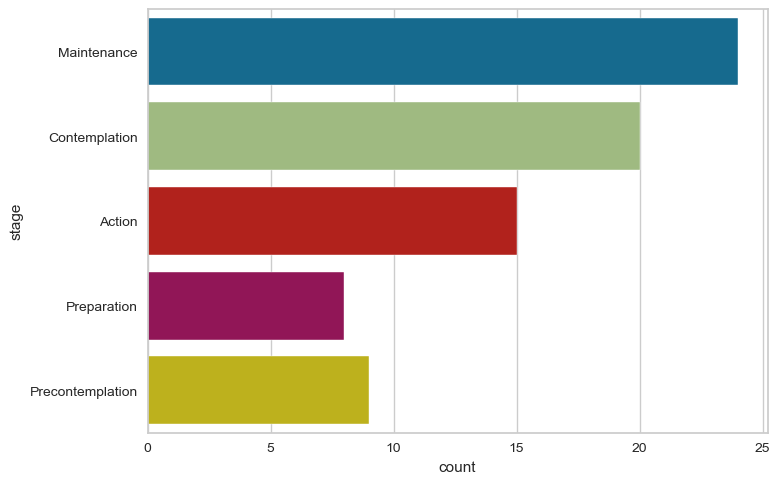

In [6]:
sns.countplot(y="stage", data=data)

In [8]:
s = setup(data=data, target='stage', silent=True, fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,"Action: 0, Contemplation: 1, Maintenance: 2, Precontemplation: 3, Preparation: 4"
4,Original Data,"(76, 47)"
5,Missing Values,True
6,Numeric Features,32
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:52:33
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


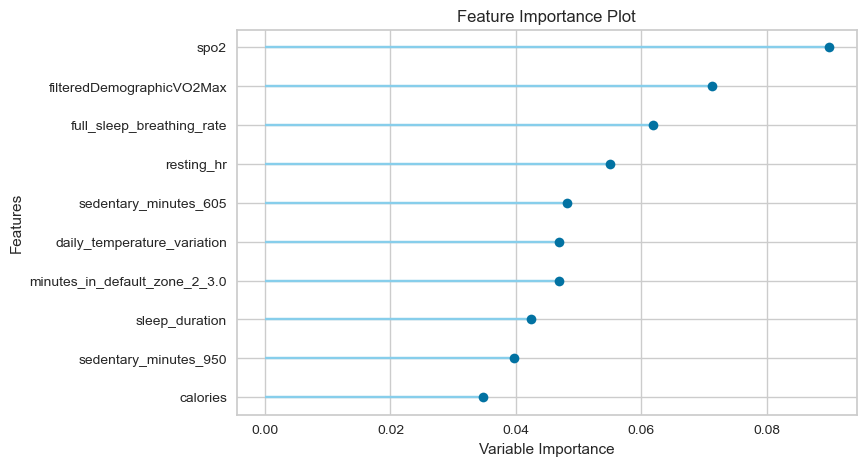

In [8]:
plot_model(best, plot='feature')

Breq self-determination prediction

In [7]:
breq = pd.read_pickle('./data/surveys/breq.pkl')
breq = breq.rename(columns={"user_id": "id", "submitdate": "date"})
breq["date"] = pd.to_datetime(pd.to_datetime(breq["date"]).dt.date)
breq

,id,type,date,breq_amotivation,breq_external_regulation,breq_introjected_regulation,breq_identified_regulation,breq_intrinsic_regulation,breq_self_determination
0,621e2e8e67b776a24055b564,breq,2021-05-31,1.00,1.00,1.000000,3.50,4.25,intrinsic_regulation
1,621e2e8e67b776a24055b564,breq,2021-07-26,1.00,1.00,1.666667,3.50,4.00,intrinsic_regulation
0,621e2eaf67b776a2406b14ac,breq,2021-11-29,1.25,1.00,1.666667,4.50,3.75,identified_regulation
1,621e2eaf67b776a2406b14ac,breq,2022-01-17,1.00,1.25,2.333333,4.00,3.50,identified_regulation
0,621e2ed667b776a24085d8d1,breq,2021-06-07,2.75,2.00,3.000000,2.50,1.00,introjected_regulation
1,621e2ed667b776a24085d8d1,breq,2021-07-30,1.00,1.50,2.333333,2.50,2.50,identified_regulation
0,621e2f3967b776a240c654db,breq,2021-05-31,1.00,2.00,1.000000,2.50,3.00,intrinsic_regulation
0,621e2f6167b776a240e082a9,breq,2021-06-01,1.00,1.25,2.333333,5.00,5.00,identified_regulation
1,621e2f6167b776a240e082a9,breq,2021-08-02,1.00,1.50,4.000000,4.75,4.50,identified_regulation
0,621e2f7a67b776a240f14425,breq,2021-05-31,1.00,1.25,1.000000,3.25,3.75,intrinsic_regulation


In [8]:
fitbit_breq = fitbit.merge(breq[['id', 'date', 'breq_self_determination']], on=['id','date'])
fitbit_breq

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,breq_self_determination
0,621e2e8e67b776a24055b564,2021-05-31,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,<30,MALE,<19,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,intrinsic_regulation
1,621e2e8e67b776a24055b564,2021-07-26,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,0.700,0.733333,-2.000223,None,2493.46,62.81010,8924.7,[Walk],72.003219,121,25,61,698,False,NaN,61.369921,32100000.0,0.0,449.0,86.0,0.0,95.0,1.402597,1.048780,0.793220,1.138298,12090.0,119.0,1293.0,1.0,0.0,<30,MALE,<19,8.660254e-01,0.000000,3.673940e-16,-8.486443e-01,0.5,1.000000,-1.000000,0.528964,intrinsic_regulation
2,621e2eaf67b776a2406b14ac,2021-11-29,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,>=30,FEMALE,<19,-8.660254e-01,0.000000,5.877853e-01,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,identified_regulation
3,621e2eaf67b776a2406b14ac,2022-01-17,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,0.650,0.733333,-2.539780,None,2286.29,47.39134,11591.8,[Sport],82.763199,346,31,32,522,False,NaN,68.757643,30540000.0,0.0,457.0,52.0,0.0,94.0,1.193182,0.896552,1.048583,1.056818,16618.0,280.0,1152.0,8.0,0.0,>=30,FEMALE,<19,8.660254e-01,0.000000,8.090170e-01,-2.993631e-01,0.5,1.000000,0.587785,-0.954139,identified_regulation
4,621e2ed667b776a24085d8d1,2021-06-07,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,<30,FEMALE,23.0,-2.449294e-16,0.000000,8.090170e-01,9.884683e-01,1.0,1.000000,0.587785,0.151428,introjected_regulation
5,621e2f3967b776a240c654db,2021-05-31,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,>=30,MALE,24.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,intrinsic_regulation
6,621e2f6167b776a240e082a9,2021-06-01,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,>=30,FEMALE,>=25,-2.449294e-16,0.781831,5.877853e-01,2.012985e-01,1.0,0.623490,0.809017,0.979530,identified_regulation
7,621e2f7a67b776a240f14425,2021-05-31,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,>=30,MALE,24.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.00000

In [9]:
data = fitbit_breq.drop(columns=['id', 'date', 'age', 'gender', 'bmi'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,breq_self_determination
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,intrinsic_regulation
1,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,0.700,0.733333,-2.000223,None,2493.46,62.81010,8924.7,[Walk],72.003219,121,25,61,698,False,NaN,61.369921,32100000.0,0.0,449.0,86.0,0.0,95.0,1.402597,1.048780,0.793220,1.138298,12090.0,119.0,1293.0,1.0,0.0,8.660254e-01,0.000000,3.673940e-16,-8.486443e-01,0.5,1.000000,-1.000000,0.528964,intrinsic_regulation
2,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,5.877853e-01,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,identified_regulation
3,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,0.650,0.733333,-2.539780,None,2286.29,47.39134,11591.8,[Sport],82.763199,346,31,32,522,False,NaN,68.757643,30540000.0,0.0,457.0,52.0,0.0,94.0,1.193182,0.896552,1.048583,1.056818,16618.0,280.0,1152.0,8.0,0.0,8.660254e-01,0.000000,8.090170e-01,-2.993631e-01,0.5,1.000000,0.587785,-0.954139,identified_regulation
4,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,8.090170e-01,9.884683e-01,1.0,1.000000,0.587785,0.151428,introjected_regulation
5,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,intrinsic_regulation
6,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,5.877853e-01,2.012985e-01,1.0,0.623490,0.809017,0.979530,identified_regulation
7,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,5.877853e-01,-2.449294e-16,0.5,1.000000,0.809017,1.000000,intrinsic_regulation
8,33.961216,NaN,NaN,97.1,NaN,NaN,NaN,NaN,NaN,-0.877764,None,3415.40,53.64790,13302.8,[Bike],66.997000,120,44,126,714,False,NaN,52.711280,26160000.0,0.0,389.0,47.0,0.0,98.0,0.413793,1.000000,1.244980,0.518072,18249.0,100.0,1242.0,45.0,0.0,-2.449294e-16,0.781831,8.090170e-01,9.987165e-01,1.0,0.623490,0.587785,-0.050649,identified_regulation
9,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.

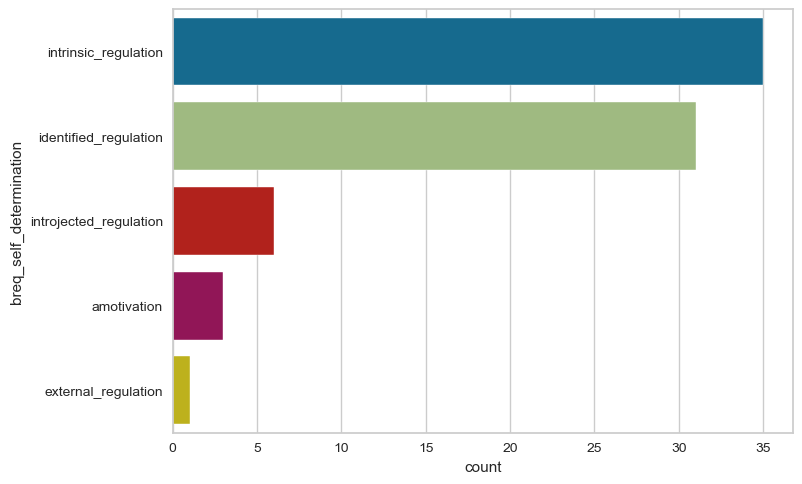

In [10]:
sns.countplot(y="breq_self_determination", data=data)

In [20]:
s = setup(data=data, target='breq_self_determination', silent=True, fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,3301
1,Target,breq_self_determination
2,Target Type,Multiclass
3,Label Encoded,"amotivation: 0, external_regulation: 1, identified_regulation: 2, intrinsic_regulation: 3, introjected_regulation: 4"
4,Original Data,"(76, 47)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

Big-5 personality prediction

In [11]:
big5 = pd.read_pickle('./data/surveys/personality.pkl')
big5 = big5.rename(columns={"user_id": "id", "submitdate": "date"})
big5["date"] = pd.to_datetime(pd.to_datetime(big5["date"]).dt.date)
big5

,id,type,date,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,bfpt,2021-05-31,21.0,33.0,45.0,42.0,40.0,MALE,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2eaf67b776a2406b14ac,bfpt,2021-11-29,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,HIGH,AVERAGE,LOW,HIGH
2,621e2ed667b776a24085d8d1,bfpt,2021-06-07,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE
3,621e2f3967b776a240c654db,bfpt,2021-05-31,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,AVERAGE,LOW,HIGH,AVERAGE
4,621e2f6167b776a240e082a9,bfpt,2021-06-01,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,AVERAGE,AVERAGE,HIGH,LOW
5,621e2f7a67b776a240f14425,bfpt,2021-05-31,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,AVERAGE,HIGH,HIGH,AVERAGE
6,621e2f9167b776a240011ccb,bfpt,2021-11-28,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,HIGH,AVERAGE,LOW,HIGH
7,621e2fb367b776a24015accd,bfpt,2021-05-31,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,AVERAGE,LOW,LOW,HIGH
8,621e2fce67b776a240279baa,bfpt,2021-05-31,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,HIGH,AVERAGE,LOW,AVERAGE
9,621e2ff067b776a2403eb737,bfpt,2021-11-29,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,HIGH,LOW,LOW,LOW


In [12]:
fitbit_big5 = fitbit.merge(big5[['id', 'date', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category']], on=['id','date'])
fitbit_big5

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,2021-05-31,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,<30,MALE,<19,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2eaf67b776a2406b14ac,2021-11-29,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,>=30,FEMALE,<19,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,AVERAGE,HIGH,AVERAGE,LOW,HIGH
2,621e2ed667b776a24085d8d1,2021-06-07,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,<30,FEMALE,23.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE
3,621e2f3967b776a240c654db,2021-05-31,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,>=30,MALE,24.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE,AVERAGE,LOW,HIGH,AVERAGE
4,621e2f6167b776a240e082a9,2021-06-01,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,>=30,FEMALE,>=25,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,HIGH,AVERAGE,AVERAGE,HIGH,LOW
5,621e2f7a67b776a240f14425,2021-05-31,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,>=30,MALE,24.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE,AVERAGE,HIGH,HIGH,AVERAGE
6,621e2f9167b776a240011ccb,2021-11-28,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,>=30,FEMALE,20.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,LOW,HIGH,AVERAGE,LOW,HIGH
7,621e2fb367b776a24015accd,2021-05-31,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.

predict extraversion

In [13]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_extraversion_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,AVERAGE
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,HIGH
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,HIGH
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,LOW
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0,1224.0,

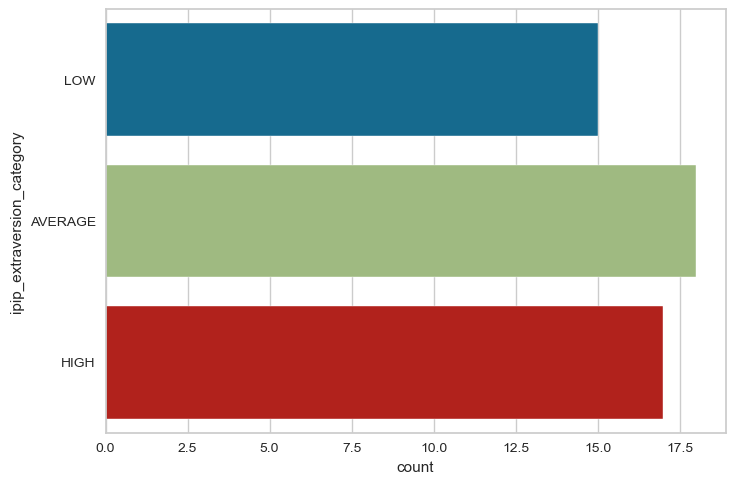

In [14]:
sns.countplot(y="ipip_extraversion_category", data=data)

In [25]:
s = setup(data=data, target='ipip_extraversion_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,5347
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,34
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4167,0.4000,0.2667,0.1069,0.1533,0.0000,0.0000,0.9300
dummy,Dummy Classifier,0.4167,0.4000,0.2667,0.1069,0.1533,0.0000,0.0000,0.0170
qda,Quadratic Discriminant Analysis,0.3500,0.3750,0.2333,0.0958,0.1367,-0.1000,-0.1112,1.1310
svm,SVM - Linear Kernel,0.3000,0.0000,0.4667,0.1361,0.2067,0.0000,0.0000,0.8500


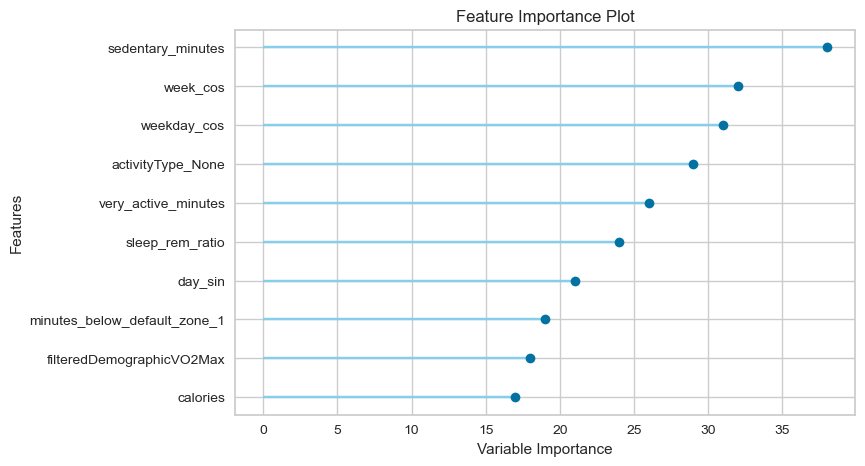

In [27]:
plot_model(best, plot='feature')

predict agreeableness

In [15]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_agreeableness_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,HIGH
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,AVERAGE
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,AVERAGE
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,HIGH
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0

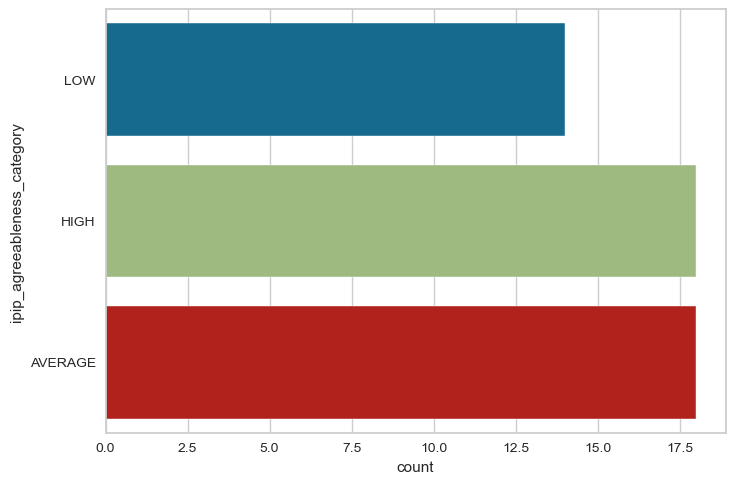

In [16]:
sns.countplot(y="ipip_agreeableness_category", data=data)

In [29]:
s = setup(data=data, target='ipip_agreeableness_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,6826
1,Target,ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5000,0.3333,0.3000,0.2500,0.2778,0.1000,0.1000,1.0400
qda,Quadratic Discriminant Analysis,0.4333,0.3500,0.2333,0.1056,0.1500,0.0000,0.0000,1.0240
dummy,Dummy Classifier,0.4333,0.3500,0.2333,0.1056,0.1500,0.0000,0.0000,0.0250
knn,K Neighbors Classifier,0.3583,0.3042,0.2500,0.1917,0.2172,-0.1033,-0.1188,0.7760


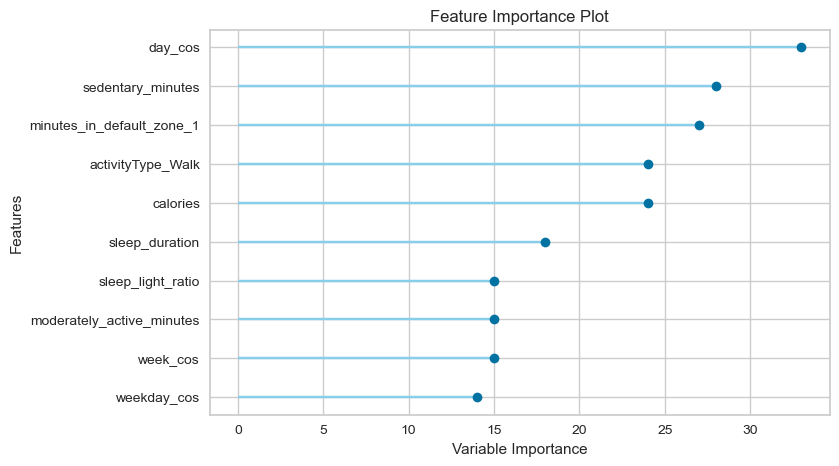

In [31]:
plot_model(best, plot='feature')

predict conscientiousness

In [17]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_conscientiousness_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,AVERAGE
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,LOW
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,AVERAGE
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,AVERAGE
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0,

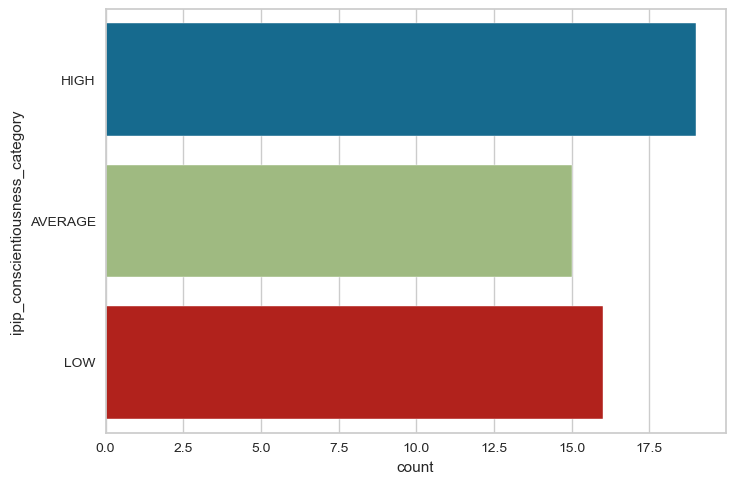

In [18]:
sns.countplot(y="ipip_conscientiousness_category", data=data)

In [33]:
s = setup(data=data, target='ipip_conscientiousness_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,3432
1,Target,ipip_conscientiousness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4500,0.6271,0.4833,0.3278,0.3556,0.1985,0.2688,0.0280
ada,Ada Boost Classifier,0.4333,0.6458,0.4500,0.3292,0.3589,0.1867,0.1978,0.0630
ridge,Ridge Classifier,0.4083,0.0000,0.4167,0.2965,0.3208,0.1217,0.1670,0.0200
rf,Random Forest Classifier,0.3583,0.5062,0.3667,0.2646,0.2822,0.0573,0.0800,0.1440
lda,Linear Discriminant Analysis,0.3583,0.6125,0.3333,0.2958,0.3167,0.0245,0.0102,0.0170
lr,Logistic Regression,0.3333,0.5958,0.3167,0.2062,0.2417,-0.0089,-0.0201,0.0330
svm,SVM - Linear Kernel,0.3250,0.0000,0.3333,0.1104,0.1633,0.0000,0.0000,0.0250
lightgbm,Light Gradient Boosting Machine,0.3250,0.5000,0.3333,0.1104,0.1633,0.0000,0.0000,0.0220
dummy,Dummy Classifier,0.3250,0.5000,0.3333,0.1104,0.1633,0.0000,0.0000,0.0270
gbc,Gradient Boosting Classifier,0.3083,0.4542,0.3167,0.2007,0.2308,-0.0155,0.0025,0.1340


In [35]:
plot_model(best, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

predict stability

In [19]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_stability_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,LOW
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,AVERAGE
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,HIGH
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,LOW
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0,1224.0,13.0,0.0,-8

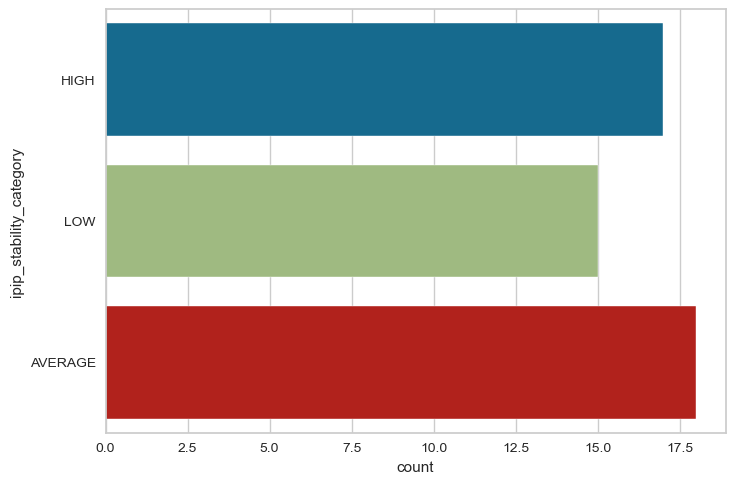

In [20]:
sns.countplot(y="ipip_stability_category", data=data)

In [37]:
s = setup(data=data, target='ipip_stability_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,8311
1,Target,ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.3750,0.4583,0.3167,0.1479,0.1950,0.0222,0.0258,1.0840
lightgbm,Light Gradient Boosting Machine,0.3750,0.4500,0.3000,0.1229,0.1767,0.0000,0.0000,1.0910
dummy,Dummy Classifier,0.3750,0.4500,0.3000,0.1229,0.1767,0.0000,0.0000,0.0250
knn,K Neighbors Classifier,0.3583,0.5083,0.3333,0.1889,0.2317,0.0020,0.0035,0.0360
lr,Logistic Regression,0.3250,0.4708,0.3000,0.2042,0.2347,-0.0500,-0.0465,0.0170
svm,SVM - Linear Kernel,0.3250,0.0000,0.4000,0.1354,0.1967,0.0000,0.0000,0.8900
ridge,Ridge Classifier,0.2833,0.0000,0.2667,0.2000,0.1972,-0.0924,-0.1206,0.0260


In [39]:
plot_model(best, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

predict intellect

In [21]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_intellect_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,HIGH
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,AVERAGE
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,LOW
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,HIGH
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0,122

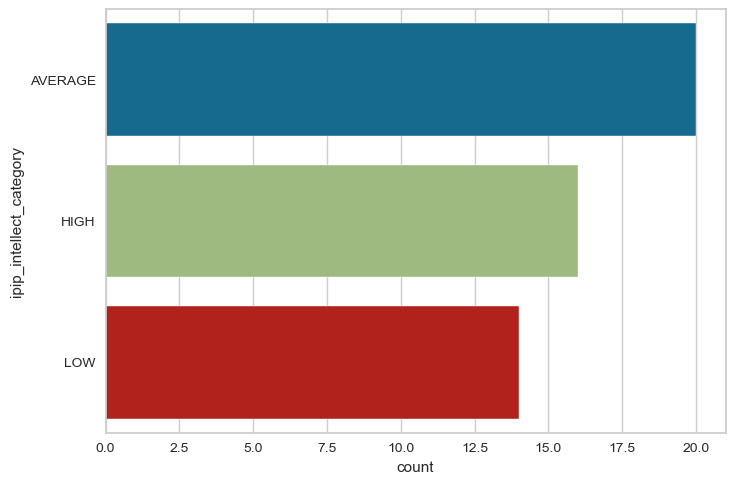

In [22]:
sns.countplot(y="ipip_intellect_category", data=data)

In [41]:
s = setup(data=data, target='ipip_intellect_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,8528
1,Target,ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3583,0.4500,0.3000,0.0993,0.1467,0.0000,0.0000,0.9860
dummy,Dummy Classifier,0.3583,0.4500,0.3000,0.0993,0.1467,0.0000,0.0000,0.0200
lr,Logistic Regression,0.3500,0.5833,0.3667,0.2389,0.2706,0.0178,0.0337,0.0180
qda,Quadratic Discriminant Analysis,0.3250,0.4417,0.4000,0.1785,0.2217,-0.0152,-0.0129,0.7830


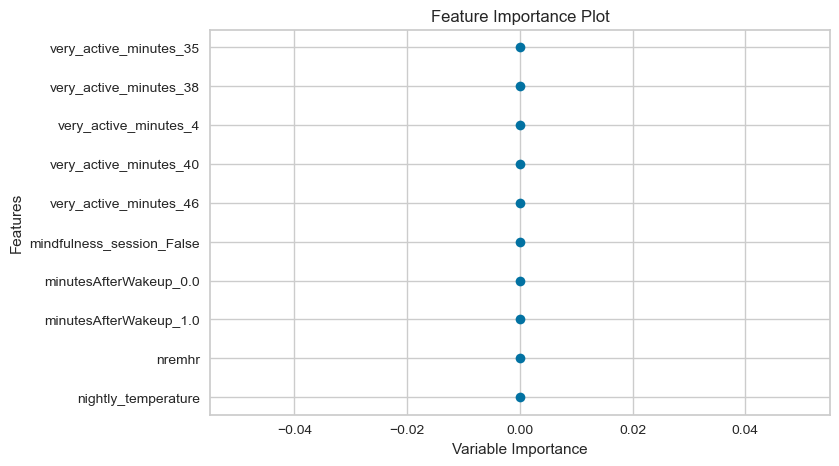

In [43]:
plot_model(best, plot='feature')